<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_31_Balanceamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Balanceamento de Dados

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Importando bibliotecas

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Base de Dados

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=2,
                           weights=[0.2, 0.8],
                           class_sep=0.01, random_state=42)


In [ ]:
df = pd.DataFrame(X)
df['target'] = y
df

,0,1,target
0,-0.218560,-0.272335,0
1,-0.013895,-0.136903,1
2,-0.437221,0.629316,1
3,-0.872943,0.692255,1
4,-1.223067,-0.842634,1
...,...,...,...
9995,-0.131589,0.246984,1
9996,-0.412895,0.050446,1
9997,2.032752,-2.320128,1
9998,0.082411,-0.131182,1


<Axes: >

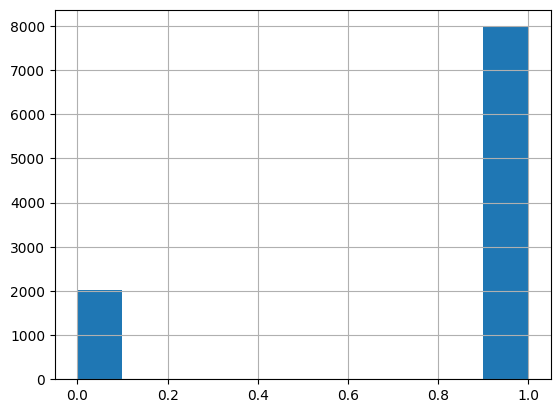

In [ ]:
df.target.hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.25      0.33       587
           1       0.84      0.93      0.88      2413

    accuracy                           0.80      3000
   macro avg       0.66      0.59      0.61      3000
weighted avg       0.77      0.80      0.78      3000



# Balanceamento de Dados com Oversampling

Envolve adicionar mais exemplos de treinamento na classe que tem poucas instâncias.


In [ ]:
# RandomOverSampler seleciona aleatoriamente exemplos da classe rara e adiciona!

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

<Axes: >

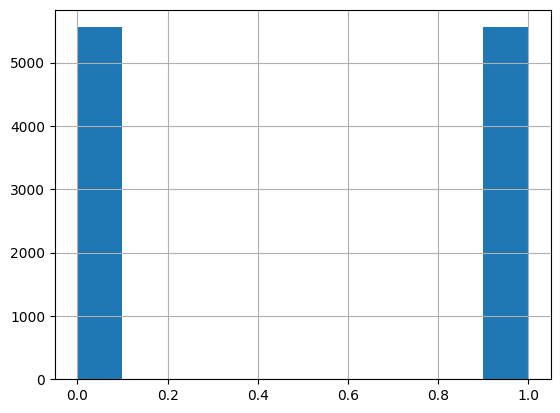

In [ ]:
df_resampled = pd.DataFrame(X_resampled)
df_resampled['target'] = y_resampled
df_resampled.target.hist()

In [ ]:
df_resampled[df_resampled.target == 0]

,0,1,target
10,0.348345,1.247477,0
13,0.748741,1.776025,0
18,-0.226500,-0.314754,0
19,-0.806350,-0.967576,0
34,0.731565,0.265826,0
...,...,...,...
11111,0.093977,-0.021317,0
11112,-0.235444,0.701461,0
11113,0.087174,0.642694,0
11114,-0.107557,0.051610,0


In [ ]:
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.36      0.37       587
           1       0.85      0.86      0.85      2413

    accuracy                           0.76      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.75      0.76      0.76      3000



**O que aconteceu?**

Neste caso, adicionamos tantos exemplos repetidos no treinamento que pode até mesmo levar a overfitting.

**Como resolver?**

E se GERARMOS novas instâncias com pequenas alterações nos valores de features para evitar overfitting?

Por exemplo:
* Selecionar e copiar uma instância e seu vizinho mais próximo.
* Calcular as diferenças dos atributos entre a instancia e este vizinho, multiplicar por um valor aleatório (entre zero e um) e adicionar na cópia.
* Assim, nós geramos um exemplo sintético, mas mantendo propriedades do exemplo real, pois fizemos pequenas perturbações.

### Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

<Axes: >

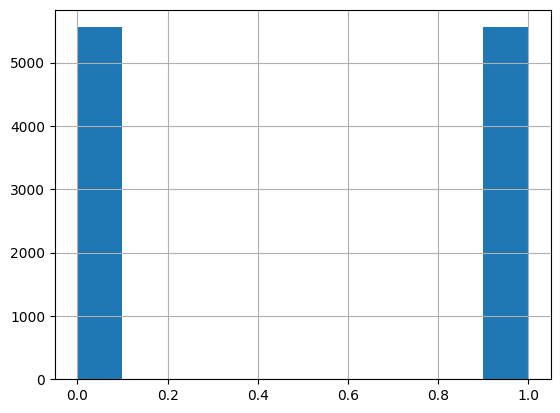

In [ ]:
df_resampled = pd.DataFrame(X_resampled)
df_resampled['target'] = y_resampled
df_resampled.target.hist()

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.46      0.37       587
           1       0.85      0.75      0.80      2413

    accuracy                           0.69      3000
   macro avg       0.58      0.61      0.59      3000
weighted avg       0.75      0.69      0.72      3000



# Balanceamento de Dados com Undersampling

Remove instâncias da classe majoritária até ficar balanceada conforme a quantidade de instâncias da classe majoritária

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

<Axes: >

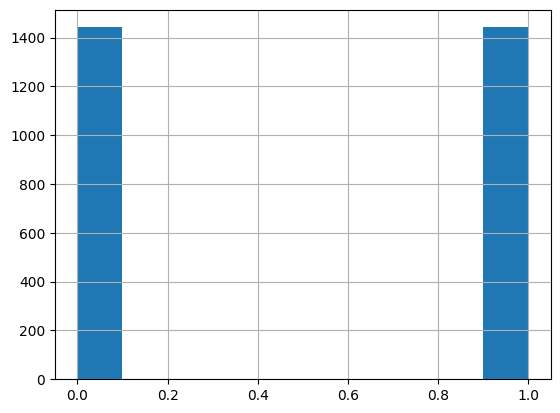

In [ ]:
df_resampled = pd.DataFrame(X_resampled)
df_resampled['target'] = y_resampled
df_resampled.target.hist()

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.60      0.38       587
           1       0.87      0.62      0.73      2413

    accuracy                           0.62      3000
   macro avg       0.57      0.61      0.55      3000
weighted avg       0.75      0.62      0.66      3000

